# 绘制表层，100m层S,U,V,T,E-P(表层)平均态和气候态

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpt
import matplotlib.colors as mcolors
from matplotlib import ticker  
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import MultipleLocator
import pandas as pd 
import xarray as xr
import cartopy.mpl.ticker
from cartopy import crs as ccrs
from scipy.io import loadmat
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter,LatitudeFormatter
plt.rcParams['font.family'] = 'Times New Roman'
mpt.rcParams['axes.unicode_minus']=False
np.set_printoptions(suppress=True)
%matplotlib qt
# %matplotlib inline

## 之前忘记加掩膜了，由于我研究的印度洋，因此掩去南海的部分

In [ ]:
# 掩去南海的部分
where_list = ['surface', 'hundred']
for i in where_list:
    filename = r'D:\all_processed_data\{}_mean&clim&detrended_data\{}_data.nc'.format(i, i)
    model_parameter = loadmat(r"D:\metrics_io.mat")
    xg, yg = model_parameter['xg'], model_parameter['yg']
    lon_all = xr.DataArray(xg[:, 1], coords=dict(lon=xg[:, 1]))
    lat_all = xr.DataArray(yg[-1, :], coords=dict(lat=yg[-1, :]))
    mask_data = xr.DataArray(loadmat(r"D:\oi\mask_io.mat")['mask_io'], coords=dict(lon=lon_all, lat=lat_all))
    mask_data = mask_data.sel(lon=slice(40, 110), lat=slice(-15, 31))
    data = xr.open_dataset(filename) * mask_data
    data = data.where(data!=0)
    data.to_netcdf(filename)

## 导入数据

In [10]:
def load_data(where):
    filename = r'D:\all_processed_data\{}_mean&clim&detrended_data\{}_data.nc'.format(where, where)
    return xr.open_dataset(filename) 

surface_STEP = load_data('surface')
hundred_STEP = load_data('hundred')

SSS = surface_STEP['mean_surface_S']
SSS = SSS.where((SSS>20)&(SSS<40))  #去除一些异常值
SST = surface_STEP['mean_surface_T']
SSU = surface_STEP['mean_surface_U']
SSV = surface_STEP['mean_surface_V']
EP = surface_STEP['mean_surface_EP'].T

hundred_S = hundred_STEP['mean_100m_S']
hundred_S = hundred_S.where((hundred_S>20)&(hundred_S<40))  #去除一些异常值
hundred_T = hundred_STEP['mean_100m_T']
hundred_U = hundred_STEP['mean_100m_U']
hundred_V = hundred_STEP['mean_100m_V']

clim_SSS = surface_STEP['clim_surface_S']
clim_SSS = clim_SSS.where((clim_SSS>20)&(SSS<40))  #去除一些异常值
clim_SST = surface_STEP['clim_surface_T']
clim_SSU = surface_STEP['clim_surface_U']
clim_SSV = surface_STEP['clim_surface_V']
clim_EP = surface_STEP['clim_surface_EP']

clim_hundred_S = hundred_STEP['clim_100m_S']
clim_hundred_S = clim_hundred_S.where((clim_hundred_S>20)&(clim_hundred_S<40))  #去除一些异常值
clim_hundred_T = hundred_STEP['clim_100m_T']
clim_hundred_U = hundred_STEP['clim_100m_U']
clim_hundred_V = hundred_STEP['clim_100m_V']

## 平均态的S,T,E-P

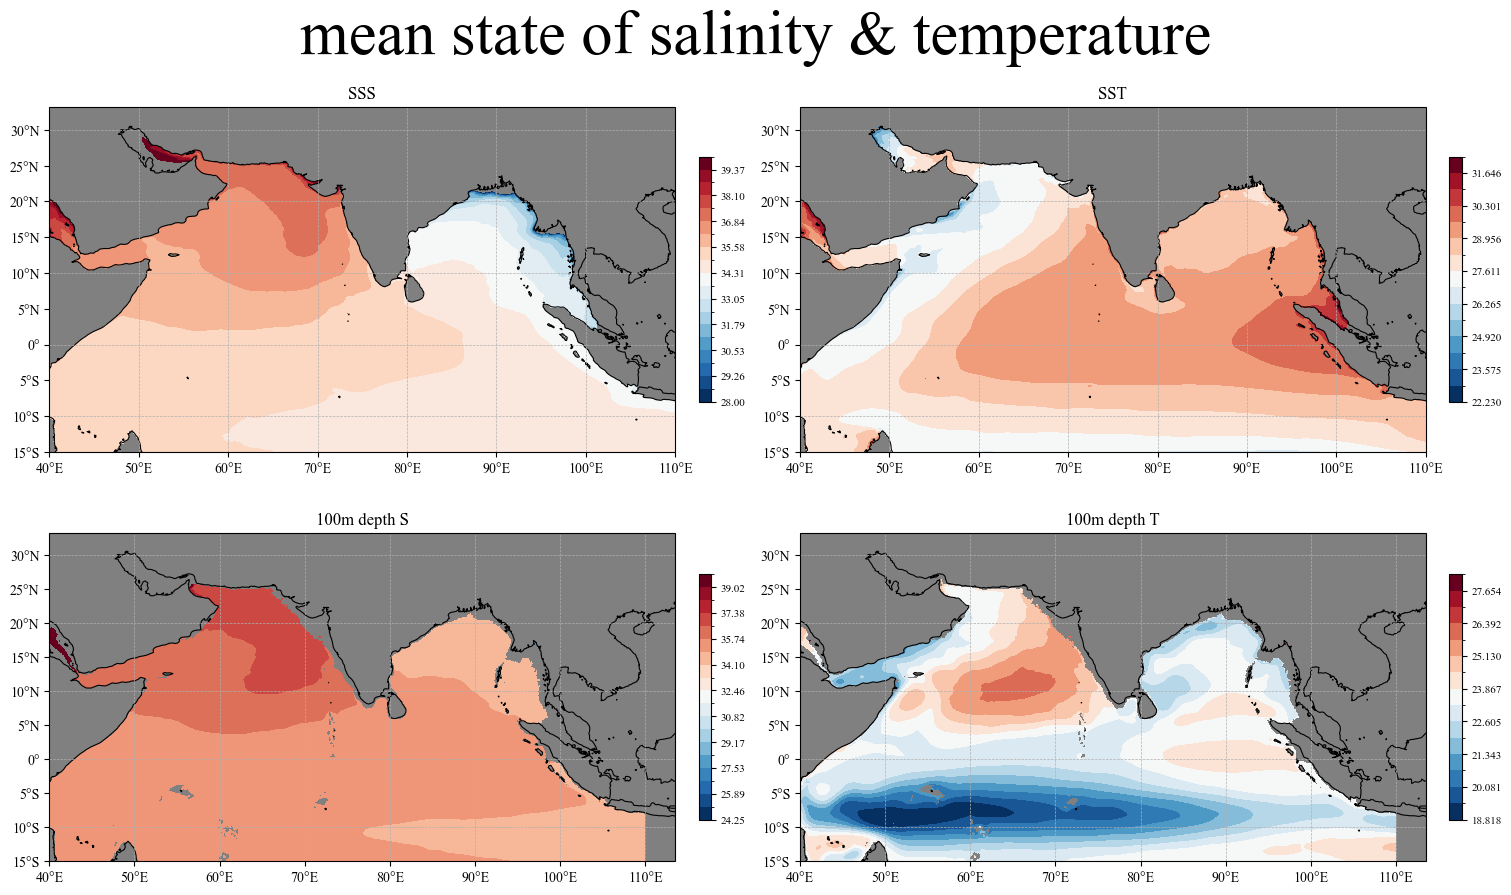

In [ ]:
lon, lat = surface_STEP.lon.data, surface_STEP.lat.data
title_list = ['SSS', 'SST', '100m depth S', '100m depth T']

crs = ccrs.PlateCarree()  # 使用地理坐标投影
fig, axes = plt.subplots(2, 2, figsize=(15, 9), 
                         subplot_kw=dict(projection=crs),
                         constrained_layout=True)
fig.suptitle('mean state of salinity & temperature', size=45)
flat_axes = axes.flat
# 自定义配色方案（RdBu_r 离散色标）
cmap = plt.cm.RdBu_r

for i, (data, levels) in enumerate(zip(
    [SSS, SST, hundred_S, hundred_T],
    [np.linspace(28, SSS.max(), 20), np.linspace(SST.min(), SST.max(), 16),
      np.linspace(hundred_S.min(), hundred_S.max(), 20), 
      np.linspace(hundred_T.min(), hundred_T.max(), 16)])):
    # 为每个子图设置离散颜色标尺
    norm = mcolors.BoundaryNorm(levels, cmap.N)
    
    # 创建带地理坐标的轴对象
    flat_axes[i].set_aspect(0.8)
    flat_axes[i].set_facecolor('gray')
    flat_axes[i].set_title(title_list[i])
    # 绘制填色图（关键设置：transform指定数据坐标系统）
    contour = flat_axes[i].contourf(lon, lat, data.T,  # 转置使纬度对应行
                         levels=levels,
                         cmap=cmap,
                         norm=norm,
                         transform=ccrs.PlateCarree())
    
  
    # 海岸线和国界线
    flat_axes[i].add_feature(cfeature.COASTLINE, linewidth=0.8)
    flat_axes[i].add_feature(cfeature.LAND, color='gray')
    # 设置经纬度范围和标签
     
    flat_axes[i].set_xticks(np.arange(40,110.1,10))
    flat_axes[i].xaxis.set_major_formatter(LongitudeFormatter()) 
    flat_axes[i].set_yticks(np.arange(-15,31.1,5))
    flat_axes[i].yaxis.set_major_formatter(LatitudeFormatter()) 
    gl = flat_axes[i].gridlines(ls='--', lw=0.5)
    gl.top_labels = False   # 关闭顶部标签
    gl.right_labels = False # 关闭右侧标签
    
    cbar = plt.colorbar(contour, ax=flat_axes[i], 
                        orientation='vertical',
                        pad=0.01,
                        shrink=0.6,
                        ticks=levels[::2])  # 每隔一个显示标签
    
    cbar.ax.tick_params(labelsize=8)  # 设置colorbar字体大小
plt.savefig(r'C:\Users\Admin\Desktop\indian_figs\whole_indian_ocean\mean_ST_state.png', dpi=400)

C:\Users\Admin\AppData\Local\Temp\ipykernel_21152\1167484785.py:19: UserWarning: Adding colorbar to a different Figure <Figure size 1500x900 with 8 Axes> than <Figure size 800x600 with 2 Axes> which fig.colorbar is called on.
  cbar = plt.colorbar(contour, ax=ax,


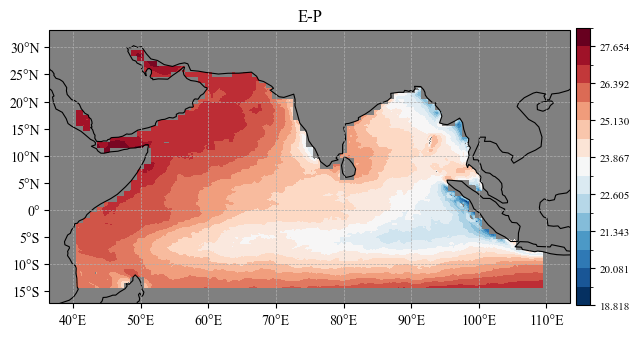

In [100]:
fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
level = np.linspace(EP.min(), EP.max(), 20)
norm = mcolors.BoundaryNorm(level, cmap.N)
ax.contourf(lon, lat, EP.T, levels=level, cmap='RdBu_r', transform=ccrs.PlateCarree())
ax.set_aspect(0.8)
ax.set_facecolor('gray')
ax.set_title('E-P')
ax.add_feature(cfeature.COASTLINE, linewidth=0.8)
ax.add_feature(cfeature.LAND, color='gray')
ax.set_xticks(np.arange(40,110.1,10))
ax.xaxis.set_major_formatter(LongitudeFormatter()) 
ax.set_yticks(np.arange(-15,31.1,5))
ax.yaxis.set_major_formatter(LatitudeFormatter()) 
gl = ax.gridlines(ls='--', lw=0.5)
gl.top_labels = False   # 关闭顶部标签
gl.right_labels = False # 关闭右侧标签

cbar = plt.colorbar(contour, ax=ax, 
                        orientation='vertical',
                        pad=0.01,
                        shrink=0.6,
                        ticks=levels[::2])  # 每隔一个显示标签
cbar.ax.tick_params(labelsize=8)  # 设置colorbar字体大小

plt.savefig(r'C:\Users\Admin\Desktop\indian_figs\whole_indian_ocean\mean_EP_state.png', dpi=400)

## 气候态的S,T,E-P

### 气候态表层S,T, E-P 和100m层S,T

In [140]:
lon, lat = surface_STEP.lon.data, surface_STEP.lat.data
month = pd.date_range('2001-01', '2001-12', freq='MS').month

# ====================图形设置====================
# 创建3行1列的网格布局
which_dict = dict(
    SSS=clim_SSS, SST=clim_SST, EP=clim_EP.T,
    hundred_S=clim_hundred_S, hundred_T=clim_hundred_T)
def clim_plot(which):
    data = which_dict[which]
    levels = dict(SSS=np.linspace(data.mean() - 4*data.std(), data.mean() + 3*data.std(), 30),
          SST=np.linspace(data.mean() - 7*data.std(), data.mean() + 4*data.std(), 30),
          EP=np.linspace(data.mean() - 6*data.std(), data.mean() + 4*data.std(), 30),
          hundred_S=np.linspace(data.mean() - 5*data.std(), data.mean() + 5*data.std(), 30),
          hundred_T=np.linspace(data.mean() - 5*data.std(), data.mean() + 5*data.std(), 30))
    crs = ccrs.PlateCarree()  # 使用地理坐标投影
    fig, axes = plt.subplots(3, 4, figsize=(15, 10), 
                         subplot_kw=dict(projection=crs),
                         constrained_layout=True)
    fig.suptitle('climate state of {}'.format(which), size=45)
    flat_axes = axes.flat
# 自定义配色方案（RdBu_r 离散色标）
    cmap = plt.cm.RdBu_r
    

    for i in range(12):
    # 为每个子图设置离散颜色标尺
        norm = mcolors.BoundaryNorm(levels[which], cmap.N)
    
    # 创建带地理坐标的轴对象
        flat_axes[i].set_aspect(0.8)
        flat_axes[i].set_facecolor('gray')
        flat_axes[i].set_title('month={}'.format(month[i]))
    # 绘制填色图（关键设置：transform指定数据坐标系统）
        contour = flat_axes[i].contourf(lon, lat, data.isel(month=i).values.T,  # 转置使纬度对应行
                         levels=levels[which],
                         cmap=cmap,
                         norm=norm,
                         transform=ccrs.PlateCarree())
    
    # --------------------地图元素设置--------------------
    # 海岸线和国界线
        flat_axes[i].add_feature(cfeature.COASTLINE, linewidth=0.8)
        flat_axes[i].add_feature(cfeature.LAND, color='gray')
    # 设置经纬度范围和标签
     
        flat_axes[i].set_xticks(np.arange(40,110.1,10))
        flat_axes[i].xaxis.set_major_formatter(LongitudeFormatter()) 
        flat_axes[i].set_yticks(np.arange(-15,31.1,5))
        flat_axes[i].yaxis.set_major_formatter(LatitudeFormatter()) 
        gl = flat_axes[i].gridlines(ls='--', lw=0.5)
        gl.top_labels = False   # 关闭顶部标签
        gl.right_labels = False # 关闭右侧标签
    
    cbar = fig.colorbar(contour, ax=axes.ravel().tolist(), 
                        orientation='horizontal',
                        pad=0.01,
                        shrink=0.6,
                        ticks=levels[which][::2])  # 每隔一个显示标签
    
    cbar.ax.tick_params(labelsize=8)  # 设置colorbar字体大小
    plt.savefig(r'C:\Users\Admin\Desktop\indian_figs\whole_indian_ocean\clim_state_{}.png'.format(which), dpi=400)

for i in which_dict.keys():
    clim_plot(i)


# clim_plot('hundred_T')


https://github.com/pablozhang123456789/indian_ocean_data_process/blob/main/SUVTEP_EOF.ipynb